In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('/Users/edwardmattern/Documents/power_model_final.csv')

df['DATE'] = pd.to_datetime(df['DATE'])

df.set_index('DATE', inplace=True)

In [10]:
df

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,LNG_PRICE,NG_STORAGE,...,AWND,PRCP,WT_FOG,WT_HFOG,WT_THNDR,WT_ICE,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-08,1.8575,71.1828,86.43,128.200,26.35,24.42,28.31,34.26,5.46,1014,...,9.40,0.01,1,0,0,0,0,0,1,43277.56926
2024-04-05,1.7850,67.9644,86.91,129.100,9.06,8.29,9.52,3.58,5.46,1014,...,7.16,0.00,0,0,0,0,0,0,0,43223.97195
2024-04-04,1.7740,65.6532,86.59,128.200,17.87,16.67,19.85,32.30,5.46,996,...,4.25,0.00,0,0,0,0,0,0,0,43286.15326
2024-04-03,1.8410,64.4220,85.43,129.650,29.29,26.91,31.87,60.99,5.46,996,...,8.50,0.00,0,0,0,0,0,0,0,43259.42649
2024-04-02,1.8620,65.9016,85.15,132.250,18.86,14.42,18.98,16.74,5.46,996,...,11.86,0.00,0,0,0,0,0,0,0,43167.79365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2.6660,36.3420,52.24,86.285,24.37,24.62,25.52,25.20,6.08,1126,...,7.16,0.00,0,0,0,0,0,0,0,42437.07003
2021-01-07,2.7270,37.4328,50.83,86.285,20.55,20.50,21.19,20.96,6.08,1163,...,10.74,0.00,0,0,0,0,0,0,0,45691.55259
2021-01-06,2.7530,37.2924,50.63,86.286,16.51,16.97,15.75,12.71,6.08,1163,...,11.63,1.04,1,0,1,0,0,0,0,49363.34411


In [5]:
df.describe()

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,LNG_PRICE,NG_STORAGE,...,AWND,PRCP,WT_FOG,WT_HFOG,WT_THNDR,WT_ICE,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,4.181724,79.940570,79.099806,214.813131,89.219046,86.226150,84.481192,88.566138,8.965983,1105.002384,...,7.825518,0.132658,0.412396,0.046484,0.176400,0.002384,0.001192,0.001192,0.106079,48539.586567
std,1.996722,18.938453,12.792776,113.275980,511.789821,513.122372,510.534617,513.415033,2.911182,133.542570,...,3.141174,0.409454,0.492559,0.210656,0.381388,0.048795,0.034524,0.034524,0.308122,8417.121634
min,1.555500,34.149600,47.620000,83.750000,8.670000,7.950000,3.540000,-1.680000,5.460000,901.000000,...,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34247.401000
25%,2.652500,64.762200,71.470000,130.400000,26.355000,24.150000,24.310000,25.340000,6.570000,1014.000000,...,5.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42208.706635
50%,3.508000,85.276800,77.810000,166.950000,36.580000,34.220000,34.290000,37.300000,7.750000,1093.000000,...,7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45888.047340
75%,5.468500,95.131800,85.220000,326.325000,58.490000,54.565000,52.390000,59.740000,10.330000,1171.000000,...,9.840000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54372.102060
max,9.710000,113.551200,119.650000,457.800000,8820.330000,8845.390000,8810.790000,8850.530000,16.720000,1489.000000,...,19.240000,4.050000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71634.595910


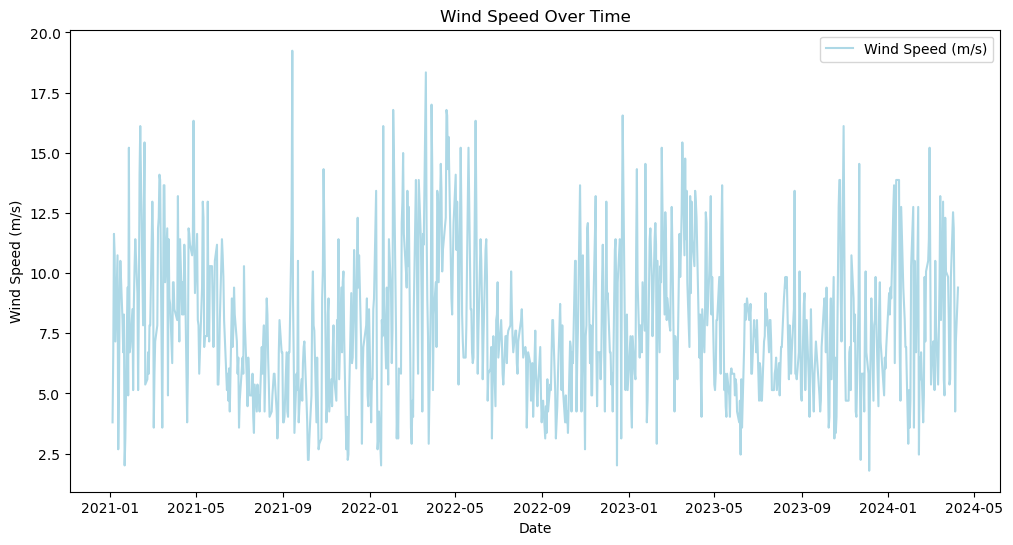

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AWND'], color='lightblue', label='Wind Speed (m/s)')
plt.title("Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()

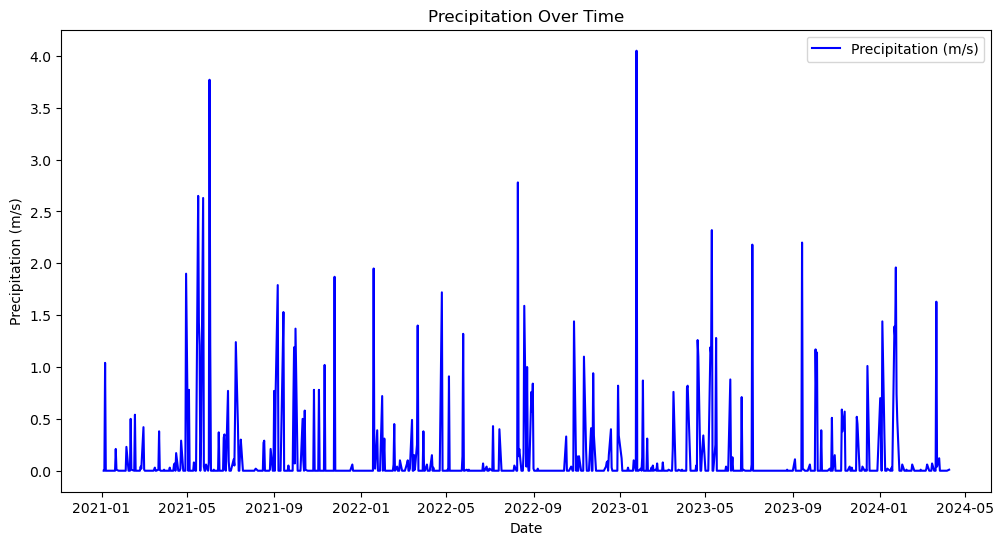

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRCP'], color='blue', label='Precipitation (m/s)')
plt.title("Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (m/s)")
plt.legend()
plt.show()

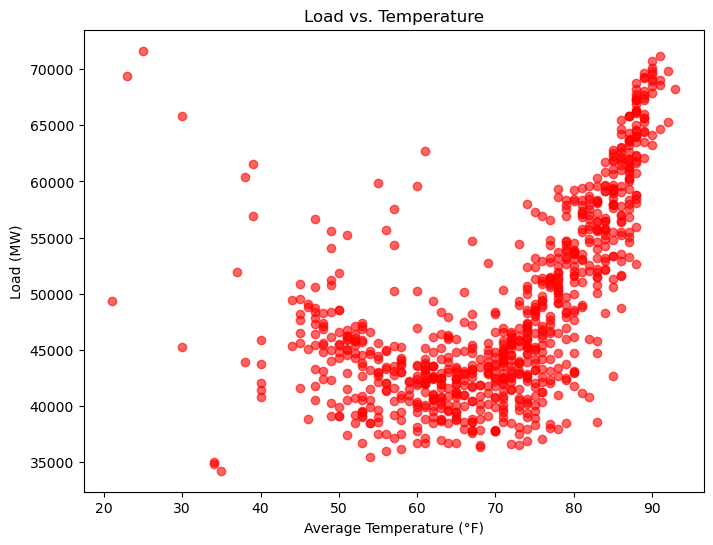

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TAVG'], df['LOAD_MW'], color='red', alpha=0.6)
plt.title("Load vs. Temperature")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Load (MW)")
plt.show()

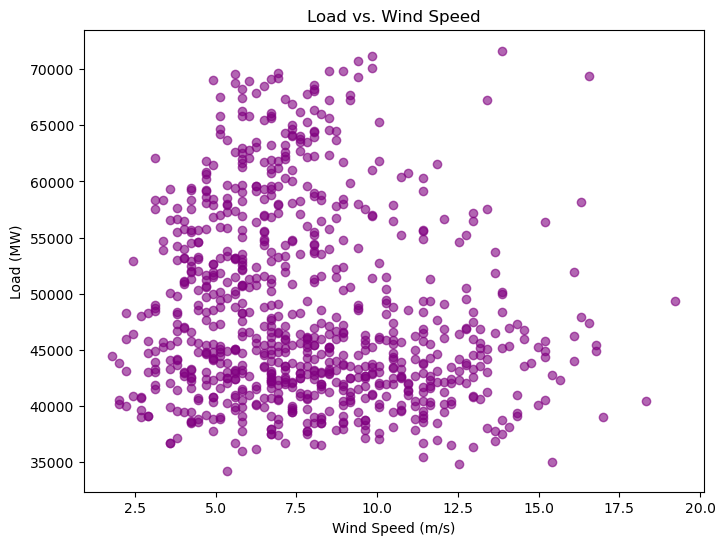

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AWND'], df['LOAD_MW'], color='purple', alpha=0.6)
plt.title("Load vs. Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Load (MW)")
plt.show()

In [12]:
# Machine Learning Model 1 (Linear Regression)

X1 = df[['AWND','PRCP','TAVG','TMAX','TMIN','CO2_PRICE','OIL_PRICE','COAL_PRICE','NG1_PRICE','LNG_PRICE','NG_STORAGE'
        ,'LMP_W']]
y1 = df['LOAD_MW']

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [14]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [15]:
df["LOAD_PRED"] = model.predict(X1)

In [16]:
mae = mean_absolute_error(y1, df["LOAD_PRED"])
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mape = mean_absolute_percentage_error(y1, df["LOAD_PRED"])
print(f"Mean Absolute Error (MAPE): {mape:.2%}")

Mean Absolute Error (MAE): 4699.48
Mean Absolute Error (MAPE): 9.72%


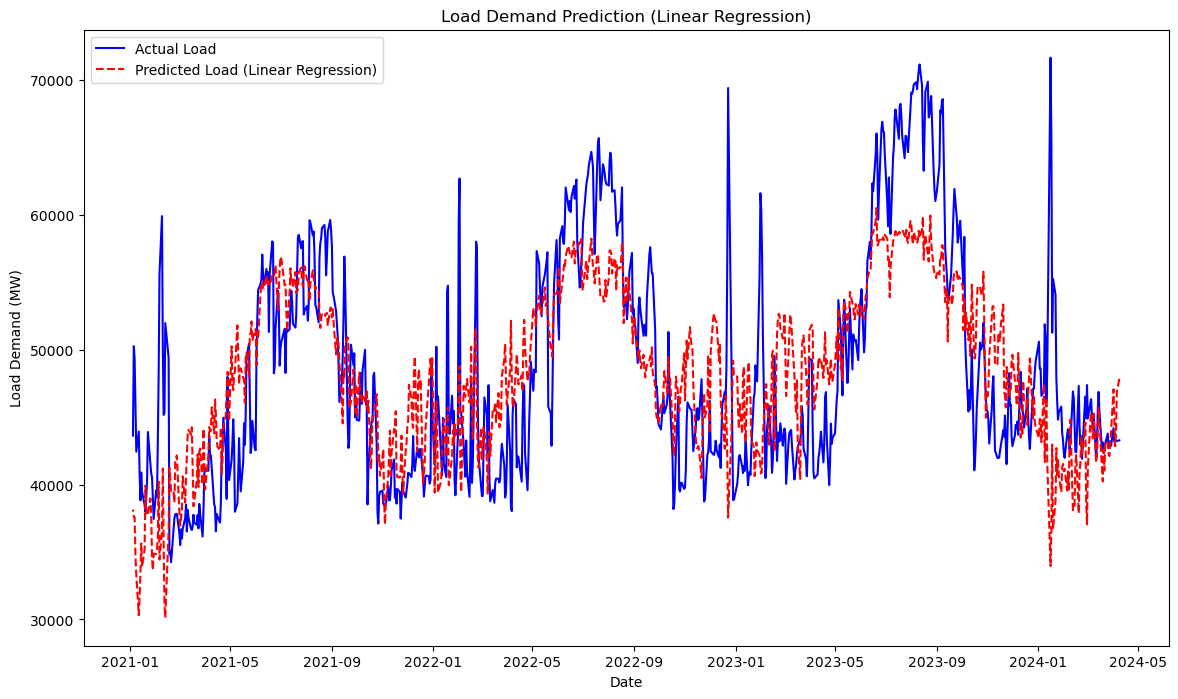

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["LOAD_MW"], label="Actual Load", color="blue")
plt.plot(df.index, df["LOAD_PRED"], label="Predicted Load (Linear Regression)", color="red", linestyle="--")
plt.title("Load Demand Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Load Demand (MW)")
plt.legend()
plt.show()

In [18]:
# Machine Learning Model 2 Gradient Boosting
X2 = df[['AWND','PRCP','TAVG','TMAX','TMIN','CO2_PRICE','OIL_PRICE','COAL_PRICE','NG1_PRICE','LNG_PRICE','NG_STORAGE'
        ,'LMP_H','LMP_N','LMP_W','LMP_S']]
y2 = df['LOAD_MW']

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=False)

In [20]:
model2 = GradientBoostingRegressor(random_state=0)
model2.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=0)

In [21]:
df["LOAD_PRED2"] = model2.predict(X2)

In [22]:
mae = mean_absolute_error(df["LOAD_MW"], df["LOAD_PRED2"])
mape = mean_absolute_percentage_error(df['LOAD_MW'], df["LOAD_PRED2"])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Error (MAE): 2223.11
Mean Absolute Percentage Error (MAPE): 4.96%


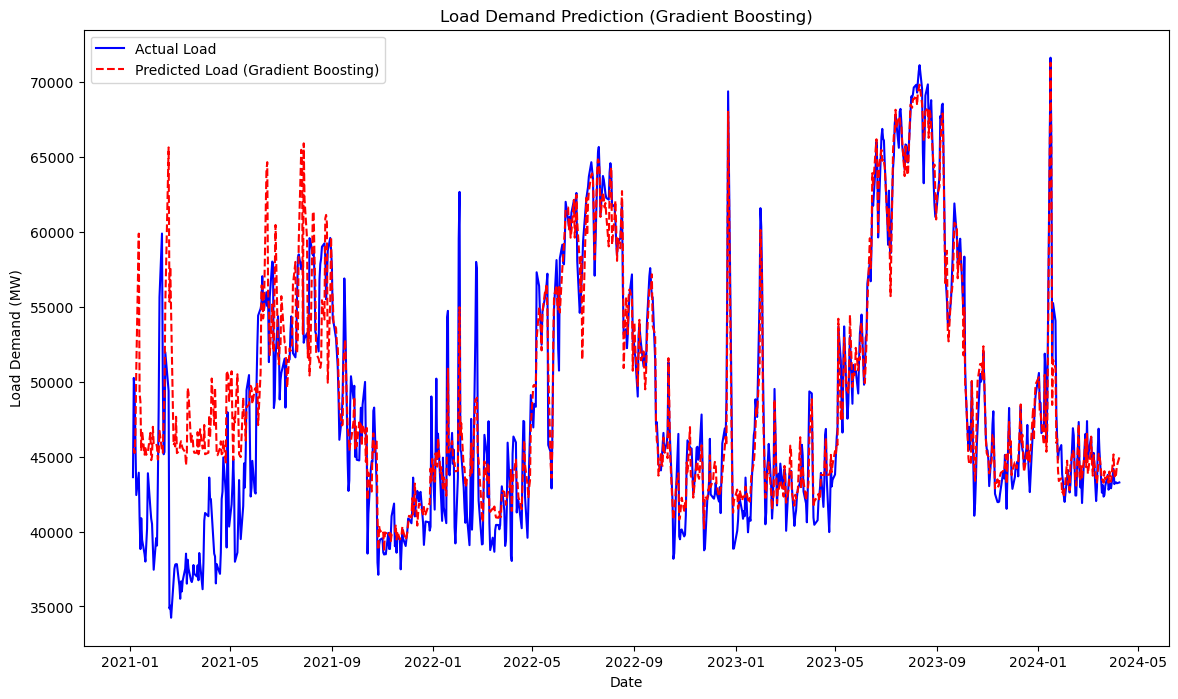

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["LOAD_MW"], label="Actual Load", color="blue")
plt.plot(df.index, df["LOAD_PRED2"], label="Predicted Load (Gradient Boosting)", color="red", linestyle="--")
plt.title("Load Demand Prediction (Gradient Boosting)")
plt.xlabel("Date")
plt.ylabel("Load Demand (MW)")
plt.legend()
plt.show()

In [24]:
# Machine Learning Model 3 XG Boosting
X3 = df[['AWND','PRCP','TAVG','TMAX','TMIN','CO2_PRICE','OIL_PRICE','COAL_PRICE','NG1_PRICE','LNG_PRICE','NG_STORAGE'
        ,'LMP_H','LMP_N','LMP_W','LMP_S']]
y3 = df['LOAD_MW']

In [25]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=False)

In [26]:
model3 = xgb.XGBRegressor(random_state=0)
model3.fit(X3_train, y3_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [27]:
df["LOAD_PRED3"] = model3.predict(X3)

In [28]:
mae = mean_absolute_error(df["LOAD_MW"], df["LOAD_PRED3"])
mape = mean_absolute_percentage_error(df['LOAD_MW'], df["LOAD_PRED3"])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Error (MAE): 1445.03
Mean Absolute Percentage Error (MAPE): 3.38%


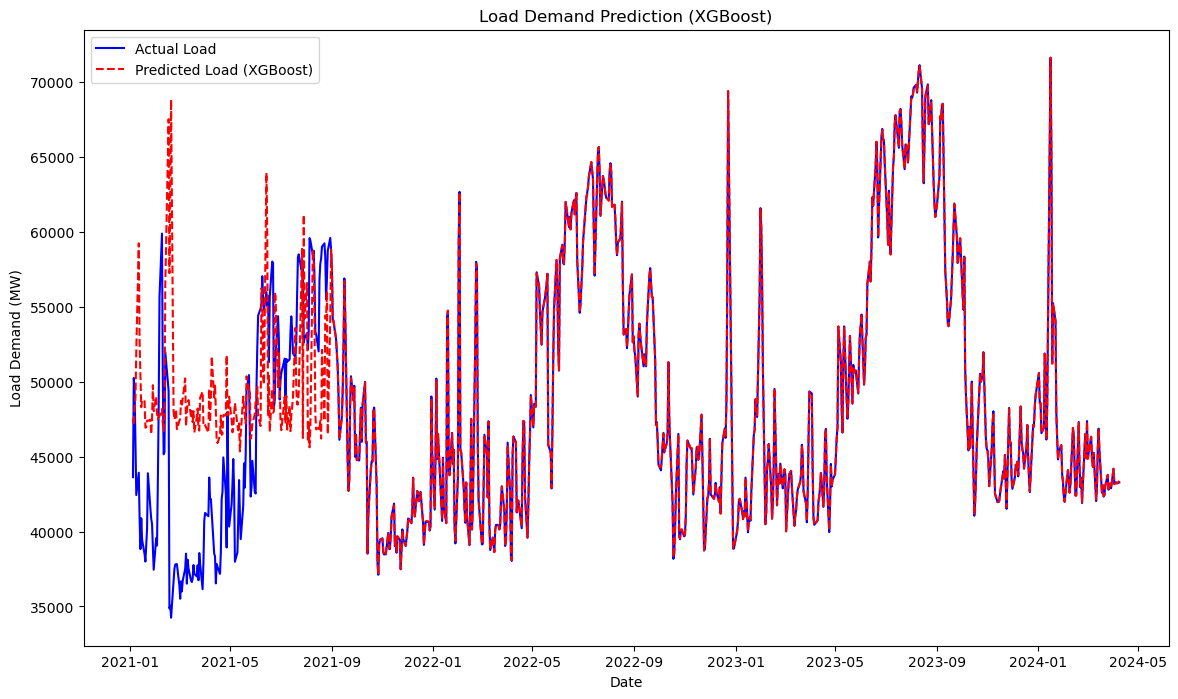

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["LOAD_MW"], label="Actual Load", color="blue")
plt.plot(df.index, df["LOAD_PRED3"], label="Predicted Load (XGBoost)", color="red", linestyle="--")
plt.title("Load Demand Prediction (XGBoost)")
plt.xlabel("Date")
plt.ylabel("Load Demand (MW)")
plt.legend()
plt.show()

In [30]:
# Physics-based modeling
df['CDD'] = np.where(df['TAVG'] > 65, df['TAVG'] - 65, 0)
df['HDD'] = np.where(df['TAVG'] < 65, 65 - df['TAVG'], 0)
df['WIND_CHILL'] = 35.74 + 0.6215 * df['TAVG'] - 35.75 * (df['AWND'] ** 0.16) + 0.4275 * df['TAVG'] * (df['AWND'] ** 0.16)
df['CUMULATIVE_T'] = df['TAVG'].rolling(window=7).sum()
df['THERMAL_INERTIA'] = df['TAVG'].ewm(span=5).mean()

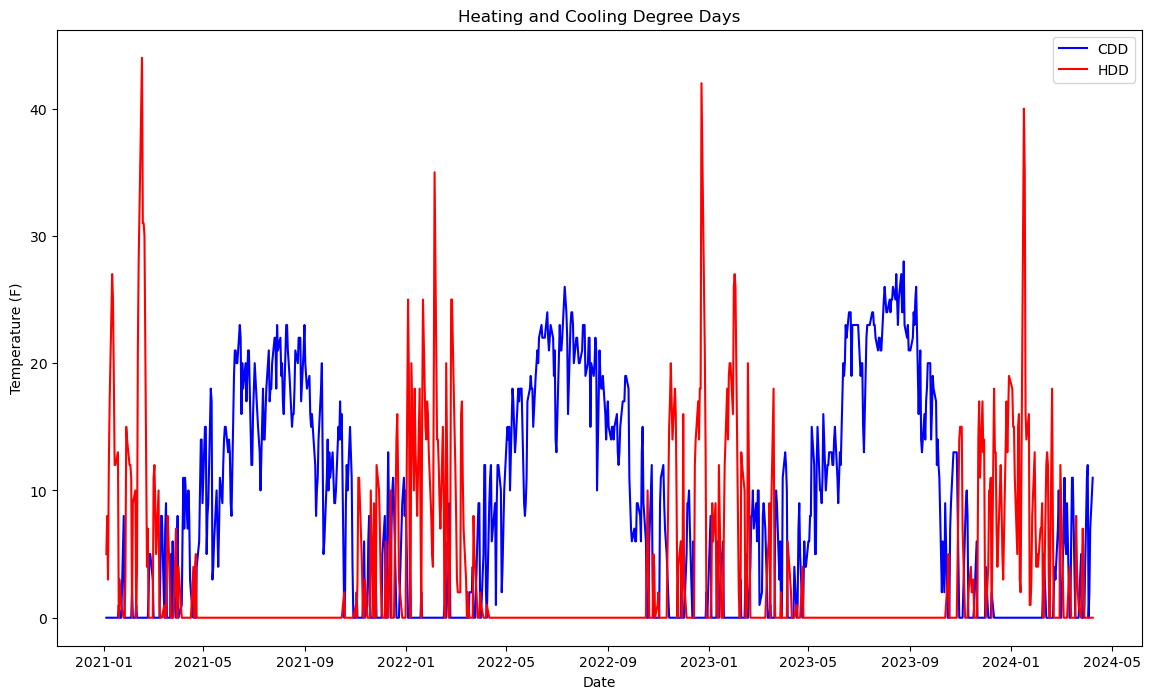

In [41]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["CDD"], label="CDD", color="blue")
plt.plot(df.index, df["HDD"], label="HDD", color="red")
plt.title("Heating and Cooling Degree Days")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.legend()
plt.show()

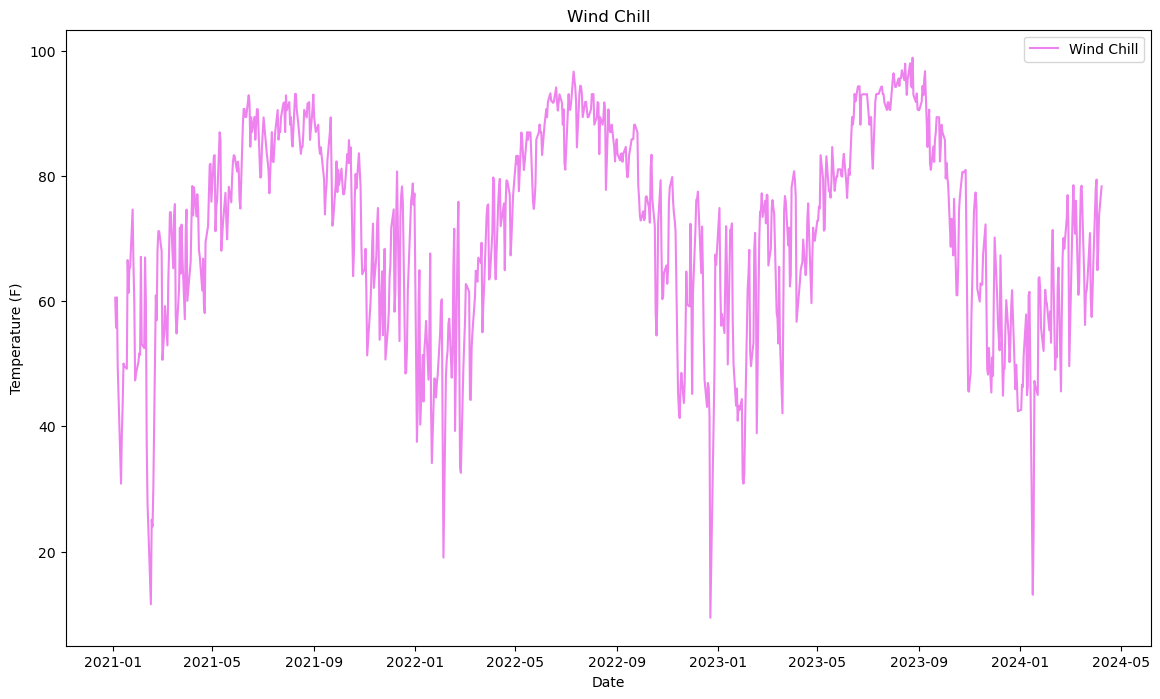

In [43]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["WIND_CHILL"], label="Wind Chill", color="violet")
plt.title("Wind Chill")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.legend()
plt.show()

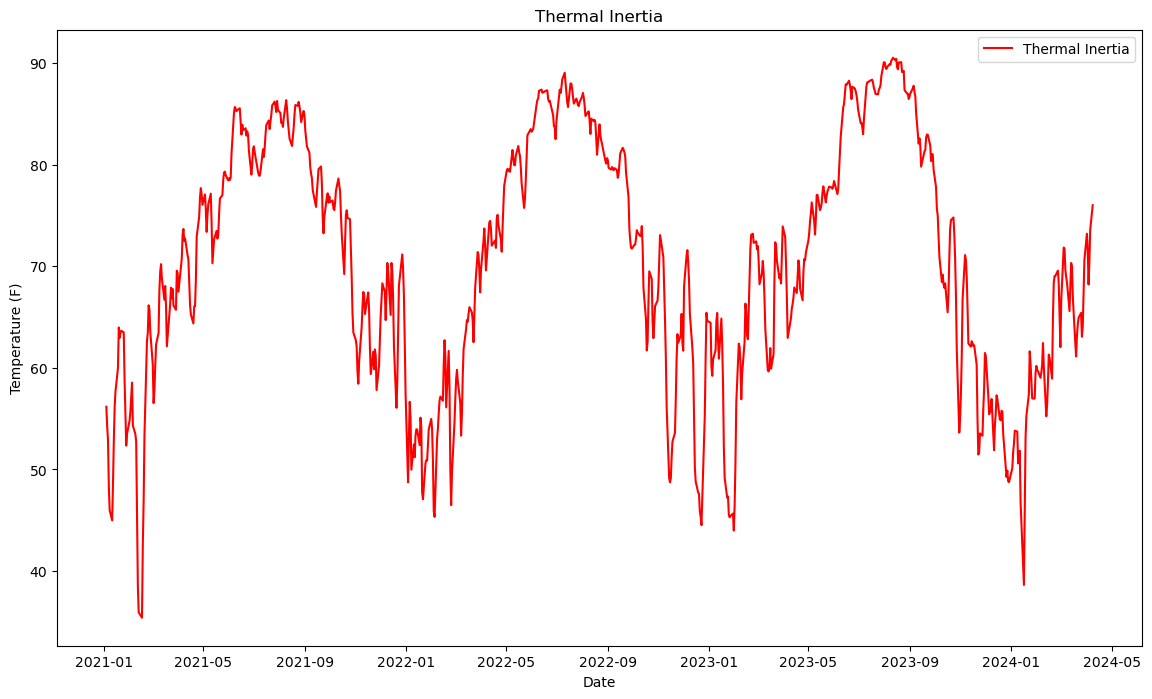

In [46]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["THERMAL_INERTIA"], label="Thermal Inertia", color="red")
plt.title("Thermal Inertia")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.legend()
plt.show()

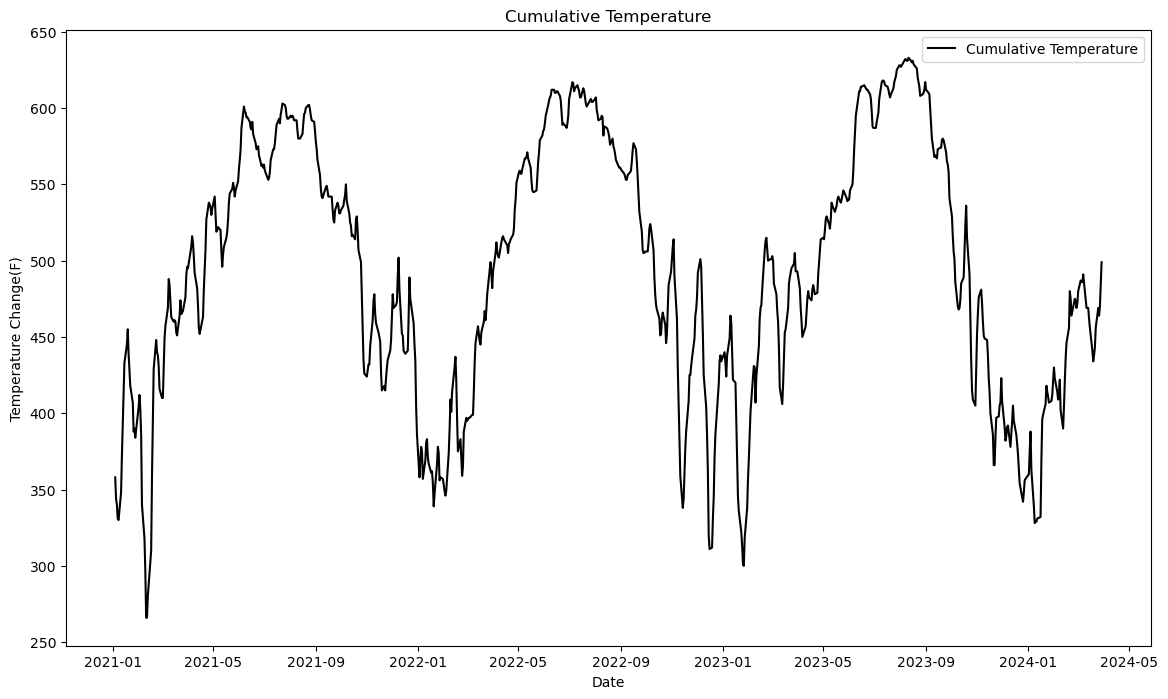

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["CUMULATIVE_T"], label="Cumulative Temperature", color="black")
plt.title("Cumulative Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature Change(F)")
plt.legend()
plt.show()

In [31]:
# Machine Learning Model 4 Hybrid Physics XG Boosting
X4 = df[['TAVG','TMAX','TMIN','LMP_H','LMP_N','LMP_W','LMP_S','AWND','PRCP','COAL_PRICE','OIL_PRICE','CO2_PRICE','NG1_PRICE'
       ,'CDD','HDD','WIND_CHILL','CUMULATIVE_T','THERMAL_INERTIA','WT_FOG','WT_HFOG','WT_ICE','WT_GLAZE','WT_HAZE','WT_THNDR']].values
y4 = df['LOAD_MW'].values

In [32]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

In [33]:
model4 = xgb.XGBRegressor(random_state=0)
model4.fit(X4_train, y4_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [34]:
y4_pred_residual = model4.predict(X4_test)

In [35]:
df['LOAD_PRED4'] = model4.predict(X4)  

In [36]:
mae = mean_absolute_error(df["LOAD_MW"], df["LOAD_PRED4"])
mape = mean_absolute_percentage_error(df['LOAD_MW'], df["LOAD_PRED4"])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Error (MAE): 472.90
Mean Absolute Percentage Error (MAPE): 1.00%


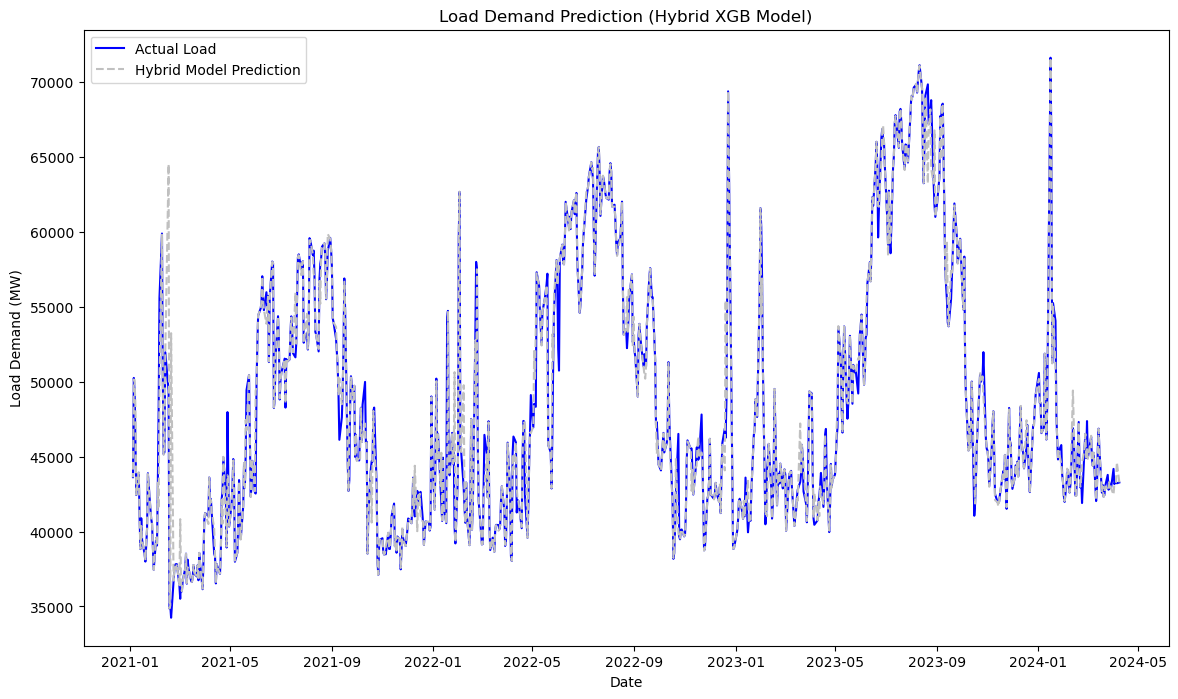

In [38]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['LOAD_MW'], label='Actual Load', color='blue')
plt.plot(df.index, df['LOAD_PRED4'], label='Hybrid Model Prediction', color='silver',linestyle="--")
plt.xlabel("Date")
plt.ylabel("Load Demand (MW)")
plt.title("Load Demand Prediction (Hybrid XGB Model)")
plt.legend()
plt.show()

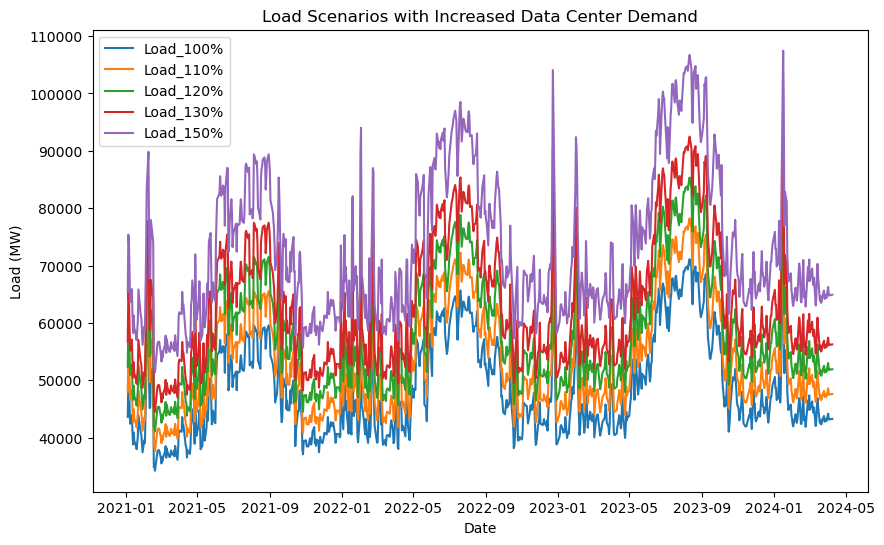

In [57]:
scaling_factors = [1.0, 1.1, 1.2, 1.3,1.5]  # 10%, 20%, 30, 50%% increases
scenarios = {f"Load_{int(factor*100)}%": df['LOAD_MW'] * factor for factor in scaling_factors}

# Plot scenarios
plt.figure(figsize=(10, 6))
for label, data in scenarios.items():
    plt.plot(df.index, data, label=label)
plt.title("Load Scenarios with Increased Data Center Demand")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

In [59]:
correlation = df[['LOAD_MW','TAVG','TMIN','TMAX','CUMULATIVE_T','AWND','PRCP','THERMAL_INERTIA','WIND_CHILL','HDD','CDD','WT_FOG','WT_HFOG','WT_ICE','WT_GLAZE','WT_HAZE','WT_THNDR','CO2_PRICE','COAL_PRICE','NG1_PRICE','OIL_PRICE']].corr()
print("Correlation between Load and Features:")
print(correlation)

Correlation between Load and Features:
                  LOAD_MW      TAVG      TMIN      TMAX  CUMULATIVE_T  \
LOAD_MW          1.000000  0.584819  0.580092  0.580618      0.635136   
TAVG             0.584819  1.000000  0.959290  0.958270      0.871134   
TMIN             0.580092  0.959290  1.000000  0.886592      0.849339   
TMAX             0.580618  0.958270  0.886592  1.000000      0.867541   
CUMULATIVE_T     0.635136  0.871134  0.849339  0.867541      1.000000   
AWND            -0.142244 -0.122124 -0.075488 -0.254082     -0.184174   
PRCP            -0.032230  0.004087  0.032511 -0.064264     -0.016690   
THERMAL_INERTIA  0.635624  0.940351  0.914262  0.929589      0.978753   
WIND_CHILL       0.579736  0.998642  0.955810  0.963585      0.871101   
HDD             -0.175576 -0.840630 -0.785733 -0.801947     -0.635782   
CDD              0.777335  0.905248  0.884614  0.870298      0.865146   
WT_FOG          -0.272095 -0.116278 -0.078927 -0.190041     -0.231924   
WT_HFOG     